In [38]:
import performance_functions
from CKA_functions import fix_dataset_shape,load_dataset
from torch.utils.data import DataLoader
from torch import argmax
import torch
import importlib
importlib.reload(performance_functions)
from performance_functions import *

In [39]:
data_path = "../Datasets/"
X = load_dataset("test_set.pkl",data_path)


In [40]:
from CKA_functions import load_model
model_path = "../models/shallow/Shallow_59_4788347.pth"
model = load_model("Shallow_59_4788347.pth","../models/shallow/")
model

ShallowFBCSPNet(
  (temporal): Conv2d(1, 10, kernel_size=(1, 25), stride=(1, 1))
  (spatial): Conv2d(10, 20, kernel_size=(22, 1), stride=(1, 1))
  (batch_norm): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): AvgPool2d(kernel_size=(1, 20), stride=(1, 20), padding=0)
  (dropout): Dropout(p=0.7, inplace=False)
  (fc): Linear(in_features=1100, out_features=4, bias=True)
)

In [41]:
test_loader = DataLoader(X, batch_size=16)

In [42]:
all_preds,all_truths = get_labels(model,dataloader=test_loader)
print(len(all_preds))
print(all_preds)
print(len(all_truths))
print(all_truths)

2592
tensor([1, 2, 2,  ..., 0, 1, 1])
2592
tensor([1, 2, 2,  ..., 0, 1, 0])


In [43]:
acc = compute_accuracy(all_preds,all_truths)
print(acc)

tensor([1, 2, 2,  ..., 0, 1, 1])
tensor([1, 2, 2,  ..., 0, 1, 0])
0.5848765432098766


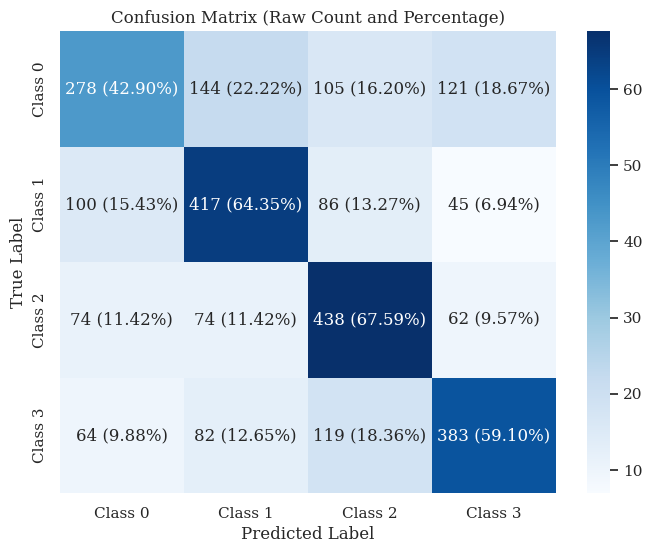

In [44]:
compute_class_confusions(all_preds,all_truths)